In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import math

import matplotlib.ticker as ticker
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, FuncFormatter, NullFormatter

import datetime  

from matplotlib import dates as mpl_dates    

plt.rcParams["font.family"] = "Times New Roman" 


In [4]:
# Data readings; burst-averaged beams velocities for all depths
b2=r"C:\Users\User\My Nortek\15_12_20\Beam velocitie_all depths_burst aver\b2newD.csv"
b2=pd.read_csv(b2,  header=None)
#b1=r"C:\Users\SBogdanov\Vend_2020_March\Vend\Nortek\My\Single ADCP\b1full.csv"
b1=r"C:\Users\User\My Nortek\15_12_20\Beam velocitie_all depths_burst aver\b1newD.csv"
b1=pd.read_csv(b1,  header=None)
#b3=r"C:\Users\SBogdanov\Vend_2020_March\Vend\Nortek\My\Single ADCP\b3full.csv"
b3=r"C:\Users\User\My Nortek\15_12_20\Beam velocitie_all depths_burst aver\b3newD.csv"
b3=pd.read_csv(b3,  header=None)

b4=r"C:\Users\User\My Nortek\15_12_20\Beam velocitie_all depths_burst aver\b4newDc.csv"
b4=pd.read_csv(b4, header=None)
#b5=r"C:\Users\SBogdanov\Vend_2020_March\Vend\Nortek\My\Single ADCP\b5full.csv"
b5=r"C:\Users\User\My Nortek\15_12_20\Beam velocitie_all depths_burst aver\b5newD.csv"
b5=pd.read_csv(b5,  header=None)
b6=r"C:\Users\User\My Nortek\15_12_20\Beam velocitie_all depths_burst aver\b6newD.csv"
b6=pd.read_csv(b6,  header=None)


VV2=pd.DataFrame( data = b1 , index = None , columns = None , dtype = None ,
copy = False )
VV1=pd.DataFrame( data = b2 , index = None , columns = None , dtype = None ,
copy = False )
VV3=pd.DataFrame( data = b3 , index = None , columns = None , dtype = None ,
copy = False )

VV4=pd.DataFrame( data = b4 , index = None , columns = None , dtype = None ,
copy = False )
VV5=pd.DataFrame( data = b5 , index = None , columns = None , dtype = None ,
copy = False )
VV6=pd.DataFrame( data = b6 , index = None , columns = None , dtype = None ,
copy = False )

VVV1=VV1.drop(VV1.columns[[0,1,2]],axis='columns')
VVV2=VV2.drop(VV2.columns[[0,1,2]],axis='columns')
VVV3=VV3.drop(VV3.columns[[0,1,2]],axis='columns')
VVV4=VV4.drop(VV4.columns[[0,1,2]],axis='columns')
VVV5=VV5.drop(VV5.columns[[0,1,2]],axis='columns')
VVV6=VV6.drop(VV6.columns[[0,1,2]],axis='columns')

# Selecting time interval

ti=9090 # Midnight, April 3.
tf=13500 # 01:30, April 7.

V1=VVV1.iloc[ti:tf]
V2=VVV2.iloc[ti:tf]
V3=VVV3.iloc[ti:tf]
V4=VVV4.iloc[ti:tf]
V5=VVV5.iloc[ti:tf]
V6=VVV6.iloc[ti:tf]


In [7]:
a0=25
sin0=np.sin(6.28*a0/360)
cos0=(1-sin0**2)**(1/2)
sina=sin0*3**(1/2)/2 
cosa=(1-sina*2)**(1/2)
cos2a=1-2*sina**2 
sin2a=2*sina*cosa
cos3a=cos2a*cosa-sin2a*sina

ta=np.tan(6.28*a0/360)
cta=1/ta



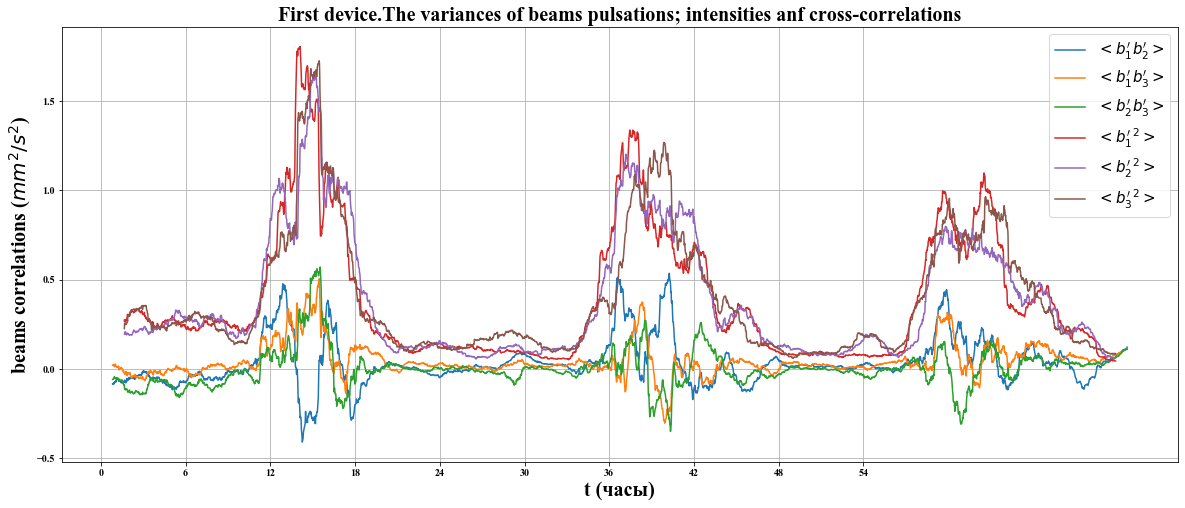

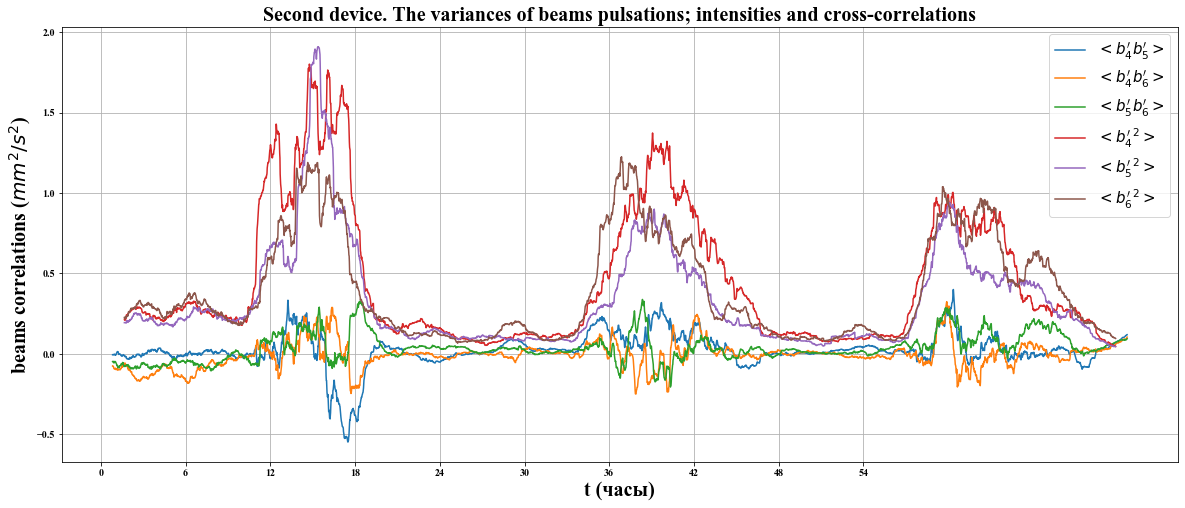

In [9]:
L0=65 # "Intersection depth" 
AB=2*L0*sina

A1=closest(lst, (L0-AB/2)) 
A2=closest(lst, (L0+AB/2)) 

t=100

V1m=V1.rolling(t,center=True).mean()
V2m=V2.rolling(t,center=True).mean()
V3m=V3.rolling(t,center=True).mean()
V4m=V4.rolling(t,center=True).mean()
V5m=V5.rolling(t,center=True).mean()
V6m=V6.rolling(t,center=True).mean()


V1f=V1-V1m
V2f=V2-V2m
V3f=V3-V3m
V4f=V4-V4m
V5f=V5-V5m
V6f=V6-V6m


A012=V1[L0]*V2[L0]
A013=V1[L0]*V3[L0]
A023=V2[L0]*V3[L0]
A045=V4[L0]*V5[L0]
A046=V4[L0]*V6[L0]
A056=V5[L0]*V6[L0]

# Structure function (longitudinal)

D_LL1=(V1[A2]-V1[A1])**2
D_LL2=(V2[A2]-V2[A1])**2
D_LL3=(V3[A2]-V3[A1])**2

D_LL4=(V4[A2]-V4[A1])**2
D_LL5=(V5[A2]-V5[A1])**2
D_LL6=(V6[A2]-V6[A1])**2

D_LL=(D_LL1+D_LL2+D_LL3)/3
sD_LL=(D_LL4+D_LL5+D_LL6)/3 #  s - second device. 

# beams cross-correlations (for alternative method of stresses calculations, by single ADCP)

b1b2=A012+(2*cosa**2/3-sina**2/2)*D_LL 
b1b3=A013+(2*cosa**2/3-sina**2/2)*D_LL 
b2b3=A023+(2*cosa**2/3-sina**2/2)*D_LL 

b4b5=A045+(2*cosa**2/3-sina**2/2)*sD_LL 
b4b6=A046+(2*cosa**2/3-sina**2/2)*sD_LL 
b5b6=A056+(2*cosa**2/3-sina**2/2)*sD_LL 

# Pulsation intensities +

b1int=V1f[L0]**2 
b11=b1int.rolling(t,center=True).mean()
b2int=V2f[L0]**2 
b22=b2int.rolling(t,center=True).mean()
b3int=V3f[L0]**2 
b33=b3int.rolling(t,center=True).mean()

b4int=V4f[L0]**2 
b44=b4int.rolling(t,center=True).mean()
b5int=V5f[L0]**2 
b55=b5int.rolling(t,center=True).mean()
b7int=V6f[L0]**2 
b77=b7int.rolling(t,center=True).mean()
b6int=V1f[L0]*V4f[L0] 
b66=b6int.rolling(t,center=True).mean()



b12=b1b2.rolling(t,center=True).mean()-V1m[L0]*V2m[L0]
b13=b1b3.rolling(t,center=True).mean()-V1m[L0]*V3m[L0]
b23=b2b3.rolling(t,center=True).mean()-V2m[L0]*V3m[L0]

b45=b4b5.rolling(t,center=True).mean()-V4m[L0]*V5m[L0]
b46=b4b6.rolling(t,center=True).mean()-V4m[L0]*V6m[L0]
b56=b5b6.rolling(t,center=True).mean()-V5m[L0]*V6m[L0]




time=np.arange(ti,tf,1)
th=time-ti 

plt.figure(figsize=(20, 8))
plt.plot(th/60,b12*10**6,label='$<b^\prime_1b^\prime_2>$')
plt.plot(th/60,b13*10**6,label='$<b^\prime_1b^\prime_3>$')
plt.plot(th/60,b23*10**6,label='$<b^\prime_2b^\prime_3>$')

plt.plot(th/60,b11*10**6,label='$<{b^\prime_1}^2>$')
plt.plot(th/60,b22*10**6,label='$<{b^\prime_2}^2>$')
plt.plot(th/60,b33*10**6,label='$<{b^\prime_3}^2>$')

plt.xlabel('t (часы)',fontsize=20)
plt.ylabel('beams correlations (${mm}^2/s^2$)',fontsize=20)


major_ticks = np.arange(0, 57, 6)
plt.xticks(major_ticks)



plt.title('First device.The variances of beams pulsations; intensities anf cross-correlations',fontsize=20)
plt.grid()
plt.legend(fontsize=15)
plt.show()


plt.figure(figsize=(20, 8))
plt.plot(th/60,b45*10**6,label='$<b^\prime_4b^\prime_5>$')
plt.plot(th/60,b46*10**6,label='$<b^\prime_4b^\prime_6>$')
plt.plot(th/60,b56*10**6,label='$<b^\prime_5b^\prime_6>$')

plt.plot(th/60,b44*10**6,label='$<{b^\prime_4}^2>$')
plt.plot(th/60,b55*10**6,label='$<{b^\prime_5}^2>$')
plt.plot(th/60,b77*10**6,label='$<{b^\prime_6}^2>$')

plt.xlabel('t (часы)',fontsize=20)
plt.ylabel('beams correlations (${mm}^2/s^2$)',fontsize=20)


major_ticks = np.arange(0, 57, 6)
plt.xticks(major_ticks)



plt.title('Second device. The variances of beams pulsations; intensities and cross-correlations',fontsize=20)
plt.grid()
plt.legend(fontsize=15)
plt.show()



In [13]:
# Stresses calculations by alternative method (single ADCP)

M=np.matrix([ 
    [1, 0, 2*cta, 0, 0, cta**2], 
    [0.25, -(3**(0.5)/2), -cta, 0.75, 3**(0.5)*cta, cta**2], 
    [0.25, (3**(.5)/2), -cta, 0.75, -3**(0.5)*cta, cta**2], 
    [-0.5, (3**(.5)/2), 0.5*cta, 0, (3**(.5)/2)*cta, cta**2], 
    [-0.5, -(3**.5/2), 0.5*cta, 0, -3**(0.5)*cta/2, cta**2],
    [0.25, 0, -cta, -0.75, 0, cta**2] 
]) 

Qinv=M**(-1)


Q1= 4.44444444e-01*b11+ 1.11111111e-01*b22+ 1.11111111e-01*b33 -4.44444444e-01*b12 -4.44444444e-01*b13+  2.22222222e-01*b23
Q12= 0  -1.92450090e-01*b22+   1.92450090e-01*b33+ 3.84900179e-01*b12  -3.84900179e-01*b13  
Q13= 1.03564086e-01*b11  -5.17820428e-02*b22  -5.17820428e-02*b33 +5.17820428e-02*b12+ 5.17820428e-02*b13-1.03564086e-01*b23
Q2=  0+   3.33333333e-01*b22+   3.33333333e-01*b33 -6.66666667e-01*b23
Q23= 0+8.96891291e-02*b22 -8.96891291e-02*b33+ 8.96891291e-02*b12 -8.96891291e-02*b13 
Q3= 2.41324196e-02*b11+ 2.41324196e-02*b22+ 2.41324196e-02*b33+ 4.82648392e-02*b12+ 4.82648392e-02*b13+ 4.82648392e-02*b23

sQ1= 4.44444444e-01*b44+ 1.11111111e-01*b55+ 1.11111111e-01*b77 -4.44444444e-01*b45 -4.44444444e-01*b46+  2.22222222e-01*b56
sQ12= 0  -1.92450090e-01*b55+   1.92450090e-01*b77+ 3.84900179e-01*b45  -3.84900179e-01*b46  
sQ13= 1.03564086e-01*b44  -5.17820428e-02*b55  -5.17820428e-02*b77 +5.17820428e-02*b45+ 5.17820428e-02*b46-1.03564086e-01*b56
sQ2=  0+   3.33333333e-01*b55+   3.33333333e-01*b77 -6.66666667e-01*b56
sQ23= 0+8.96891291e-02*b55 -8.96891291e-02*b77+ 8.96891291e-02*b45 -8.96891291e-02*b46 
sQ3= 2.41324196e-02*b44+ 2.41324196e-02*b55+ 2.41324196e-02*b77+ 4.82648392e-02*b45+ 4.82648392e-02*b46+ 4.82648392e-02*b56


In [14]:
a0=3.14159*25/180
ta=np.tan(a0)
sin=np.sin(a0)
cos=np.cos(a0)
cta=1/ta
cta


q1av=b11
q2av=b22
q3av=b33
q4av=b44
q5av=b55
q7av=b77
q6av=b66




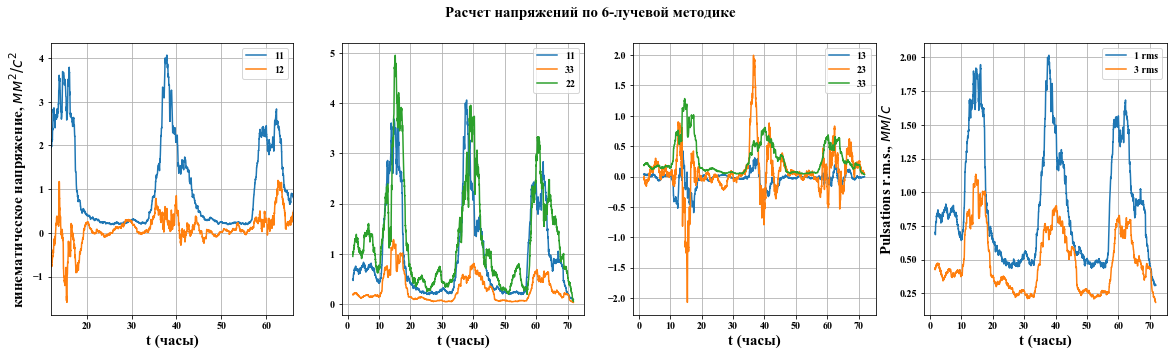

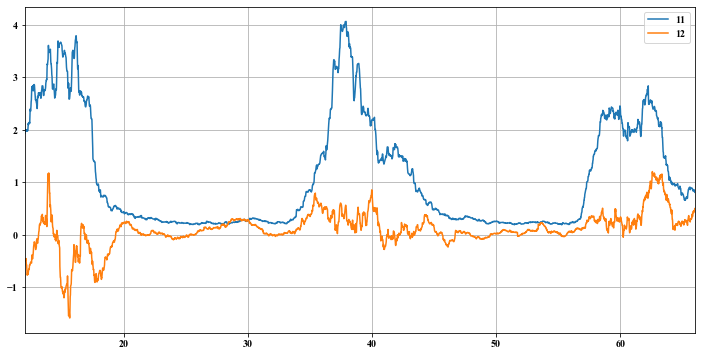

In [15]:

# Coupled-ADCP method

a0=3.14159*25/180
ta=np.tan(a0)
sin=np.sin(a0)
cos=np.cos(a0)
cta=1/ta
cta

QQ1=(q1av+q4av-2*q6av)/4
QQ12=-(q2av+q5av-q3av-q7av)/2/3**(1/2)
QQ3=(q1av+q4av+2*q6av)/4/cta**2
QQ2=((q2av+q5av+q3av+q7av)-Q1-Q3*4*cta**2)/3
QQ13=(q1av-q4av)/4/cta
QQ23=(q2av-q5av-q3av+q7av)/2/3**(1/2)

QQ1_rms=QQ1**(1/2)
QQ3_rms=QQ3**(1/2)
QQh_rms=(QQ1+QQ2)**(1/2)


c=sin**(-2)
d=sin**(-1)

fig, ax = plt.subplots(1,4, figsize=(20,5))

ax[0].plot(th/60,c*QQ1*10**6, label='11')
ax[0].plot(th/60,c*QQ12*10**6,label='12')
ax[0].set_xlim([12,66])
ax[0].legend()
ax[0].grid()

ax[1].plot(th/60,c*QQ1*10**6,label=11)
ax[1].plot(th/60,c*QQ3*10**6,label=33)
ax[1].plot(th/60,c*QQ2*10**6,label=22)

ax[0].set_xlabel('t (часы)', fontsize=15)
ax[1].set_xlabel('t (часы)', fontsize=15)
ax[0].set_ylabel('кинематическое напряжение, ${мм}^2/c^2$', fontsize=15)

ax[1].legend()
ax[1].grid()

ax[2].plot(th/60,c*QQ13*10**6,label=13)
ax[2].plot(th/60,c*QQ23*10**6,label=23)
ax[2].plot(th/60,c*QQ3*10**6,label=33)
ax[2].legend()
ax[2].grid()
ax[2].set_xlabel('t (часы)', fontsize=15)

ax[3].plot(th/60,d*QQ1_rms*10**3, label='1 rms')
ax[3].plot(th/60,d*QQ3_rms*10**3, label='3 rms')
ax[3].legend()
ax[3].grid()
ax[3].set_xlabel('t (часы)', fontsize=15)
ax[3].set_ylabel('Pulsations r.m.s., ${мм}/c$', fontsize=15)

plt.suptitle('Расчет напряжений по 6-лучевой методике', fontsize=15)
plt.show() 


plt.figure(figsize=(12,6))
plt.plot(th/60,c*QQ1*10**6, label='11')
plt.plot(th/60,c*QQ12*10**6,label='12')
plt.xlim([12,66])
plt.legend()
plt.grid()
plt.show()

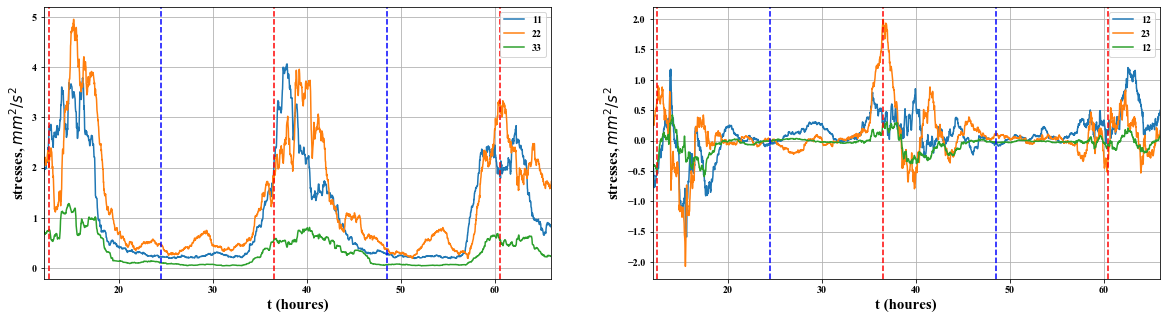

In [16]:
fig, ax = plt.subplots(1,2, figsize=(20,5))

x1coords=np.arange(12.5,70,24)
x2coords=np.arange(24.5,70,24)



ax[0].plot(th/60,c*QQ1*10**6, label='11')
ax[0].plot(th/60,c*QQ2*10**6,label='22')
ax[0].plot(th/60,c*QQ3*10**6,label='33')
ax[0].set_xlim([12,66])
ax[0].legend()
ax[0].grid()
for xc in x1coords:
    ax[0].axvline(x=xc,color='r', linestyle='--')
    
for xc in x2coords:
    ax[0].axvline(x=xc,color='b', linestyle='--')


ax[1].plot(th/60,c*QQ12*10**6,label=12)
ax[1].plot(th/60,c*QQ23*10**6,label=23)
ax[1].plot(th/60,c*QQ13*10**6,label=12)

for xc in x1coords:
    ax[1].axvline(x=xc,color='r', linestyle='--')
    
for xc in x2coords:
    ax[1].axvline(x=xc,color='b', linestyle='--')


ax[0].set_xlabel('t (houres)', fontsize=15)
ax[1].set_xlabel('t (houres)', fontsize=15)
ax[0].set_ylabel('stresses, ${mm}^2/s^2$', fontsize=15)
ax[1].set_ylabel('stresses, ${mm}^2/s^2$', fontsize=15)
#x=np.arange(100,3850,1)
#ax[1].fill_between(x,-0.000001,0.000004, where = (Q2 < 0), facecolor='green', alpha=0.3,interpolate=True)

ax[1].set_xlim([12,66])
ax[1].legend()
ax[1].grid()

plt.show()

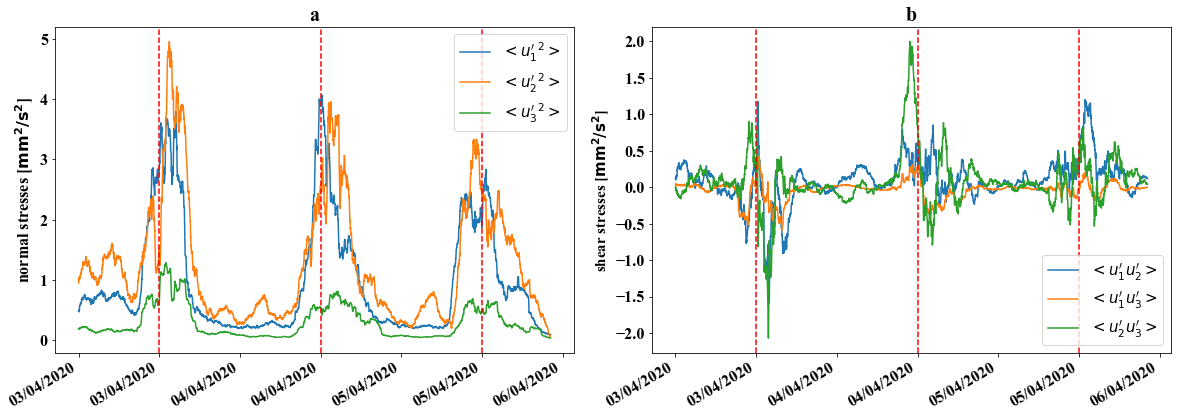

In [17]:
#import matplotlib.pyplot as p
start = datetime.datetime(2020, 3, 27, 16,30)

t11=9090
t22=13500

time = [start + datetime.timedelta(minutes=i-100) for i in range(t11,t22)]

plt.figure(figsize=(20, 6))

plt.subplot(1,2,1)

plt.gca().xaxis.set_major_formatter(mpl_dates.DateFormatter('%d/%m/20%y'))


y1 =[c*QQ1[i]*10**6 for i in range(t11, t22)]
y2 =[c*QQ2[i]*10**6 for i in range(t11, t22)]
y3 =[c*QQ3[i]*10**6 for i in range(t11, t22)]

plt.plot(time,y1,time,y2,time,y3)
plt.legend(['$<{u^\prime_1}^2>$','$<{u^\prime_2}^2>$','$<{u^\prime_3}^2>$'], fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=14)

for xc in range(t11+720,t22,1440):
    plt.axvline(start + datetime.timedelta(minutes=xc),color='r', linestyle='--')
plt.ylabel('normal stresses [${\mathbf {mm^2/s^2}}$]',fontsize=16)
plt.title('a',fontsize=20)
plt.xticks(rotation = 30,ha='right') 
plt.tick_params(axis='both', which='major', labelsize=16)


plt.subplot(1,2,2)

plt.gca().xaxis.set_major_formatter(mpl_dates.DateFormatter('%d/%m/20%y'))

y4 =[c*QQ12[i]*10**6 for i in range(t11, t22)]
y5 =[c*QQ13[i]*10**6 for i in range(t11, t22)]
y6 =[c*QQ23[i]*10**6 for i in range(t11, t22)]

plt.plot(time,y4,time,y5,time,y6)
plt.legend(['$<{u^\prime_1}{u^\prime_2}>$','$<{u^\prime_1}{u^\prime_3}>$','$<{u^\prime_2}{u^\prime_3}>$'], fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=14)

for xc in range(t11+720,t22,1440):
    plt.axvline(start + datetime.timedelta(minutes=xc),color='r', linestyle='--')
plt.ylabel('shear stresses [${\mathbf {mm^2/s^2}}$]',fontsize=15)
plt.title('b',fontsize=20)
plt.xticks(rotation = 30,ha='right') 
plt.tick_params(axis='both', which='major', labelsize=16)


plt.subplots_adjust(wspace=0.15, hspace=0.25)
plt.savefig("Fig 2.png",dpi=600)

#plt.show()

